In [1]:
import pandas as pd

<AxesSubplot:xlabel='Date'>

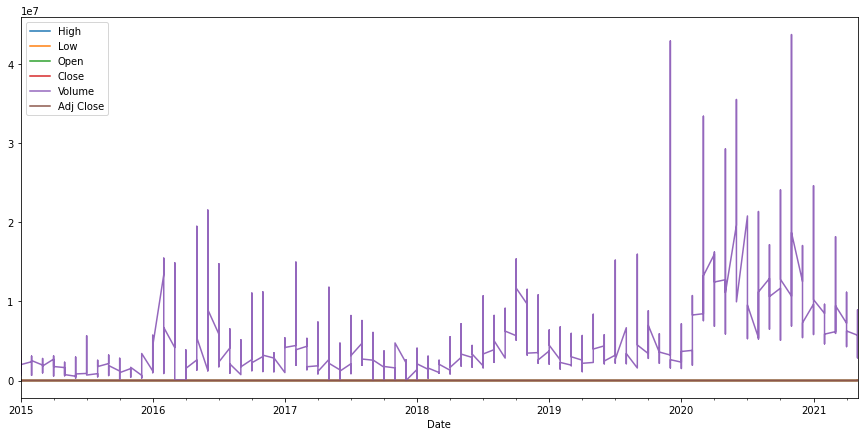

In [2]:
acoes = pd.read_csv("gol.csv")
# acoes["Date"].to_period("M")

data = pd.to_datetime(acoes.Date) 

acoes.Date = data
# Por perido de mês .to_period("M")
sep = acoes.set_index("Date").to_period("M")

# acoes.Date
sep.plot(figsize = (15, 7))

In [3]:
# acoes.info()
sep.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1581 entries, 2015-01 to 2021-05
Freq: M
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1581 non-null   float64
 1   Low        1581 non-null   float64
 2   Open       1581 non-null   float64
 3   Close      1581 non-null   float64
 4   Volume     1581 non-null   float64
 5   Adj Close  1581 non-null   float64
dtypes: float64(6)
memory usage: 86.5 KB


In [4]:
acoes.Date = pd.to_datetime(acoes.Date)
acoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1581 non-null   datetime64[ns]
 1   High       1581 non-null   float64       
 2   Low        1581 non-null   float64       
 3   Open       1581 non-null   float64       
 4   Close      1581 non-null   float64       
 5   Volume     1581 non-null   float64       
 6   Adj Close  1581 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 86.6 KB


In [5]:
# dt_intervalo = dt.Date.astype('datetime64[M]')
# Testando separar por mês
# mas ainda não foi aplicado

In [6]:

# No caso, acoes["Date"] = acoes['Date'].dt.to_period('M')
acoes.set_index("Date", inplace=True)


In [7]:
acoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1581 entries, 2015-01-02 to 2021-05-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1581 non-null   float64
 1   Low        1581 non-null   float64
 2   Open       1581 non-null   float64
 3   Close      1581 non-null   float64
 4   Volume     1581 non-null   float64
 5   Adj Close  1581 non-null   float64
dtypes: float64(6)
memory usage: 86.5 KB


<AxesSubplot:xlabel='Date'>

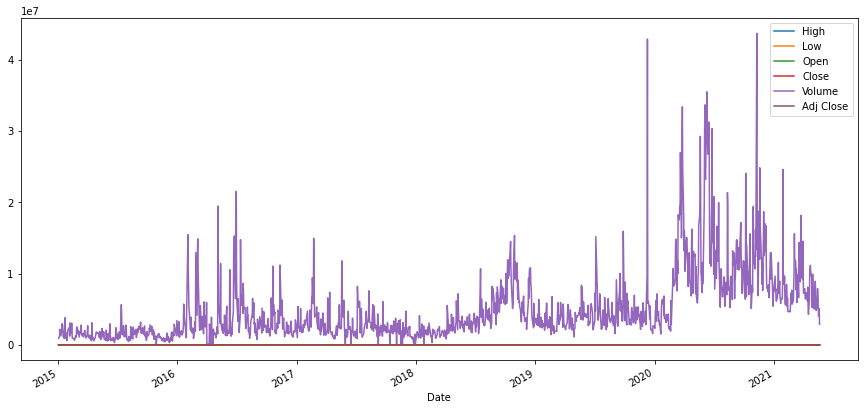

In [8]:
acoes.plot(figsize = (15, 7))

<AxesSubplot:xlabel='Date'>

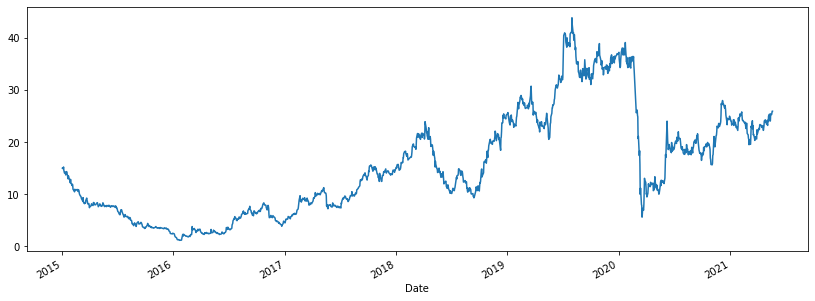

In [9]:
acoes.Close.plot(figsize = (14, 5))
# Aparti daqui vai ser usado só os valores de Close

In [10]:

# o metodo rolling é para aplicar medidas moveis, e o mean é o das médias
acoes.Close.rolling(12).mean()

Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
                ...    
2021-05-14    24.224167
2021-05-17    24.340000
2021-05-18    24.518333
2021-05-19    24.724167
2021-05-20    24.950833
Name: Close, Length: 1581, dtype: float64

<AxesSubplot:xlabel='Date'>

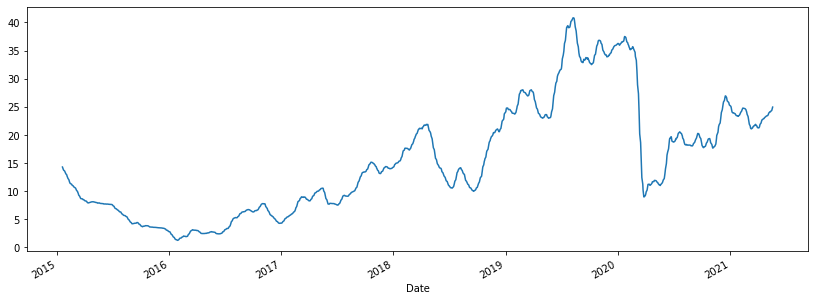

In [11]:
acoes.Close.rolling(12).mean().plot(figsize=(14, 5))

In [12]:
# Agora agrupando por anos
acoes.Close.groupby(acoes.index.year).sum()

Date
2015    1689.430001
2016    1037.860000
2017    2614.799996
2018    3969.650002
2019    7652.629992
2020    5079.449984
2021    2153.840002
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

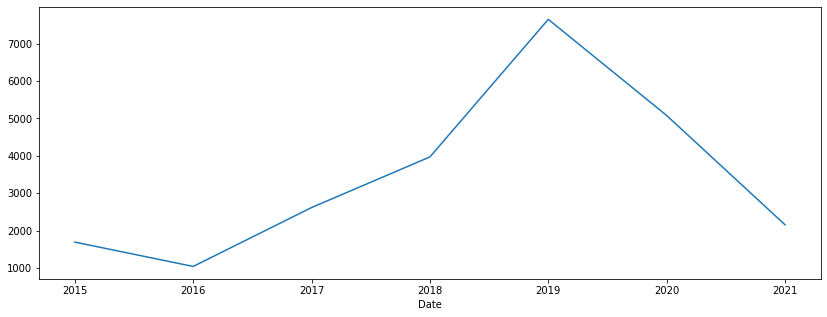

In [13]:
acoes.Close.groupby(acoes.index.year).sum().plot(figsize=(14, 5))

<AxesSubplot:xlabel='Date'>

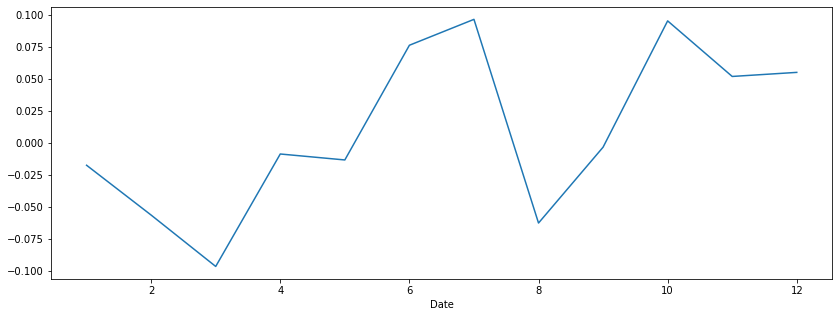

In [14]:
acoes.Close.diff().groupby(acoes.index.month).mean().plot(figsize=(14, 5))

In [15]:
# Ver apenas as informações de 2017 até 2019
f = (acoes.index.year >= 2017) & (acoes.index.year <= 2019)
# aplicando o filtro, aplicando a diferença, agrupando por mês e gerando o gráfico
# acoes[f].Close.diff().groupby(acoes.index.month).mean().plot(figsize=(14, 5))

In [16]:

acoes.Close.diff().groupby(acoes.index.month).mean()

Date
1    -0.017569
2    -0.056429
3    -0.096490
4    -0.008786
5    -0.013429
6     0.076032
7     0.096231
8    -0.062632
9    -0.003468
10    0.095039
11    0.051695
12    0.054874
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

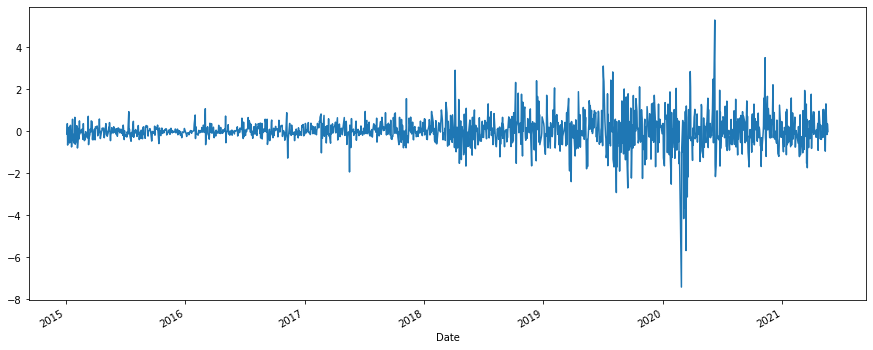

In [17]:
acoes.Close.diff().plot(figsize=(15, 6))

<AxesSubplot:xlabel='Date'>

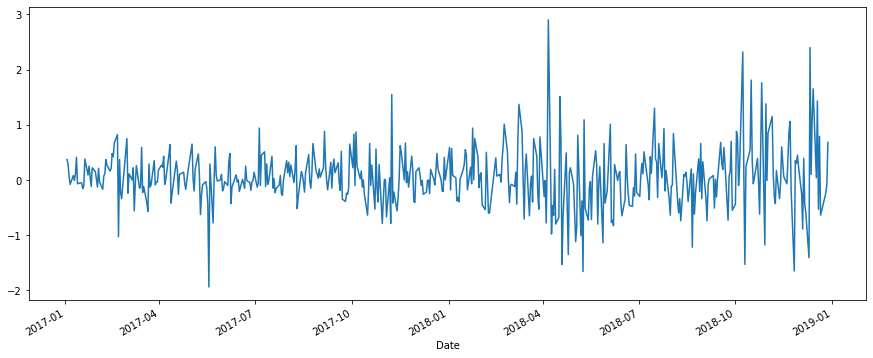

In [18]:
f = (acoes.index.year >= 2017) & (acoes.index.year <= 2018)
# aplicando o filtro, aplicando a diferença, agrupando por mês
acoes[f].Close.diff().plot(figsize=(15, 6))

<AxesSubplot:xlabel='Date'>

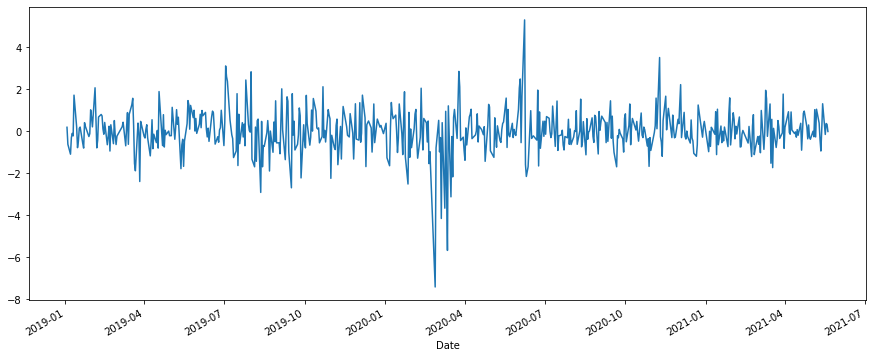

In [19]:
f = (acoes.index.year >= 2019) & (acoes.index.year <= 2021)
# aplicando o filtro, aplicando a diferença, agrupando por mês
acoes[f].Close.diff().plot(figsize=(15, 6))

<AxesSubplot:xlabel='Date'>

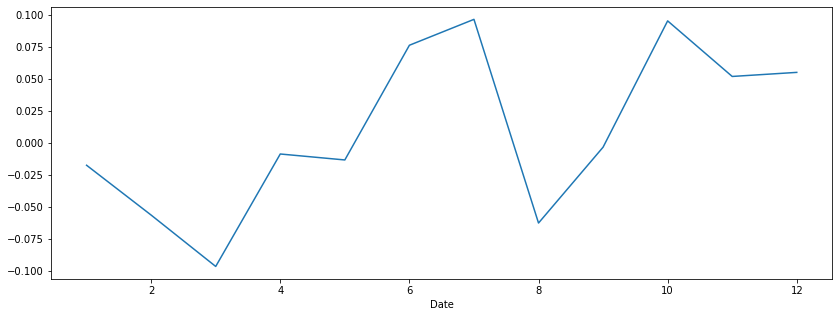

In [20]:
acoes.Close.diff().groupby(acoes.index.month).mean().plot(figsize=(14, 5))

<AxesSubplot:xlabel='Date'>

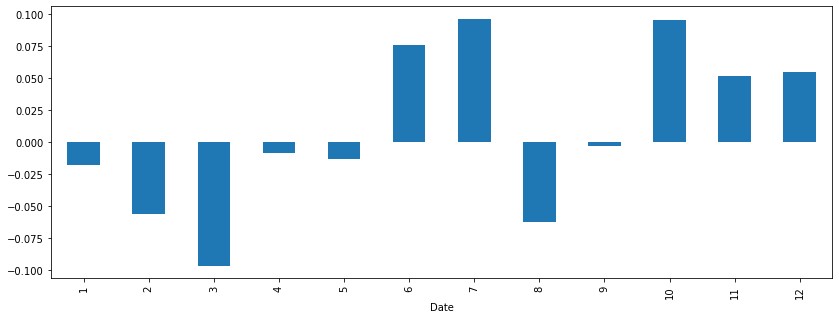

In [21]:
acoes.Close.diff().groupby(acoes.index.month).mean().plot(figsize=(14, 5), kind = "bar")

In [22]:
serie = acoes.Close.diff().groupby(acoes.index.month).mean()
serie

Date
1    -0.017569
2    -0.056429
3    -0.096490
4    -0.008786
5    -0.013429
6     0.076032
7     0.096231
8    -0.062632
9    -0.003468
10    0.095039
11    0.051695
12    0.054874
Name: Close, dtype: float64

In [23]:
from visibility_graph import visibility_graph
import networkx as nx
import matplotlib.pyplot as plt

serie_t = list(serie)
serie_t

gg = visibility_graph(serie_t)

g = nx.Graph()
gg.nodes()

serie_t

[-0.01756943762302405,
 -0.05642858194926423,
 -0.09649006736199581,
 -0.008785704204014458,
 -0.013428589275905026,
 0.07603173596518378,
 0.09623079483325665,
 -0.0626315891294551,
 -0.003467744396578881,
 0.09503874852675798,
 0.05169495081497452,
 0.05487393331127008]

In [24]:
g.edges()

EdgeView([])

In [25]:
# ([(0, 1), (0, 2)(-), (0, 3), (0, 4)(-), (1, 2), (1, 3), (2, 3), (3, 4)])
# Olhando para esses vetores eles são parecidos

for i in gg.nodes():
    g.add_node(i)

g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))

In [26]:
for fu in list(gg.edges()):
    g.add_edge(fu[0], fu[1])

g.edges()

EdgeView([(0, 1), (0, 3), (0, 5), (0, 6), (1, 2), (1, 3), (1, 5), (2, 3), (3, 4), (3, 5), (4, 5), (5, 6), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9), (9, 10), (9, 11), (10, 11)])

In [27]:
# Mostra o dicionario do vetores
g.degree()

DegreeView({0: 4, 1: 4, 2: 2, 3: 5, 4: 2, 5: 5, 6: 5, 7: 3, 8: 3, 9: 5, 10: 2, 11: 2})

In [28]:
# gerando matrix adjacency
adi = nx.adj_matrix(g)
# Mostrando ela completa
adi.todense()

matrix([[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]])

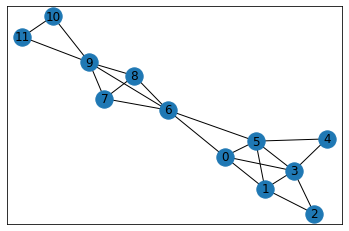

In [29]:
plt.figure(1)
nx.draw_networkx(g, pos=nx.spring_layout(g), with_labels=True)
plt.show()